# Bank Loan Default Prediction

# Project Overview

This project focuses on predicting loan default risk using a Decision Tree Classifier based on customer demographic and financial data such as income, age, credit score, employment type, and loan amount.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA) 

In [2]:
data=pd.read_csv(r"C:\Users\Aysha Riya\OneDrive\Documents\loan_default.csv")

In [3]:
data

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,Male,28717,Self-Employed,313,34453,48,Yes
1,49,Male,147449,Self-Employed,803,19544,12,No
2,35,Female,48699,Salaried,530,13258,36,Yes
3,63,Female,93686,Salaried,383,31841,48,No
4,28,Male,87661,Salaried,429,49758,24,Yes
...,...,...,...,...,...,...,...,...
495,33,Male,146944,Salaried,787,1155,24,No
496,32,Male,132726,Self-Employed,423,2958,24,No
497,51,Male,101974,Salaried,713,11693,60,No
498,22,Female,125947,Salaried,471,40112,48,No


#  Displaying the first 5 rows of the dataset

In [4]:
data.head()

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,Male,28717,Self-Employed,313,34453,48,Yes
1,49,Male,147449,Self-Employed,803,19544,12,No
2,35,Female,48699,Salaried,530,13258,36,Yes
3,63,Female,93686,Salaried,383,31841,48,No
4,28,Male,87661,Salaried,429,49758,24,Yes


# Showing summary statistics 

In [5]:
data.describe()

,age,income,credit_score,loan_amount,loan_term
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,43.53600,84338.774000,577.446000,24270.928000,36.672000
std,13.02613,39718.152211,154.929175,14018.820235,17.109702
min,21.00000,20077.000000,300.000000,1097.000000,12.000000
25%,32.00000,47888.000000,446.750000,12298.000000,24.000000
50%,45.00000,85375.500000,584.000000,23659.500000,36.000000
75%,54.25000,120509.000000,713.000000,35565.000000,48.000000
max,65.00000,149948.000000,849.000000,49998.000000,60.000000


# Checking for missing values

In [6]:
data.isna().sum()

age                0
gender             0
income             0
employment_type    0
credit_score       0
loan_amount        0
loan_term          0
default            0
dtype: int64

# Visualization

# Distribution of loan amounts (histogram) 

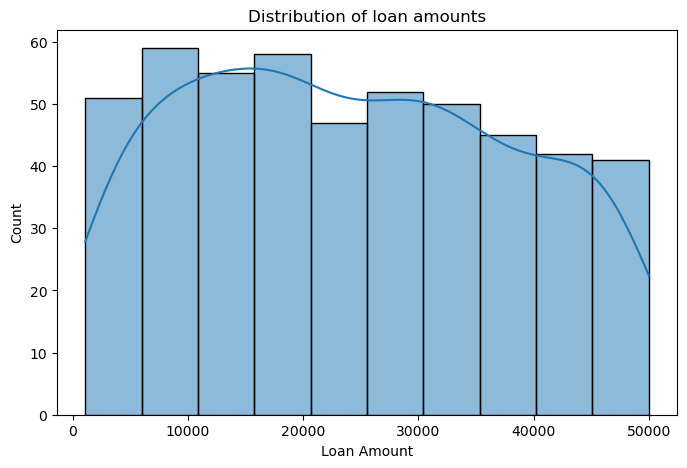

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data['loan_amount'], kde=True)
plt.title("Distribution of loan amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

# Average income of defaulters vs non-defaulters (barplot)

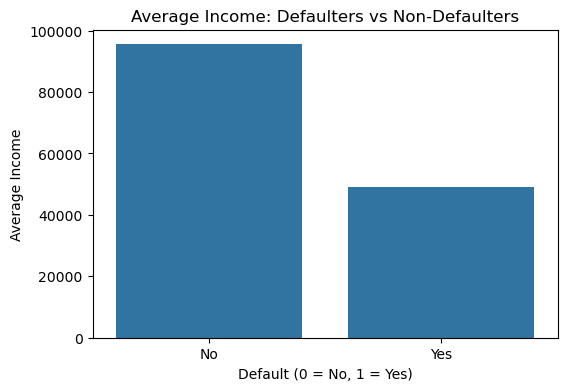

In [12]:
avg_income = data.groupby("default")['income'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=avg_income.index, y=avg_income.values)
plt.title("Average Income: Defaulters vs Non-Defaulters")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Average Income")
plt.show()

# Relationship between credit score and default(bar chart)

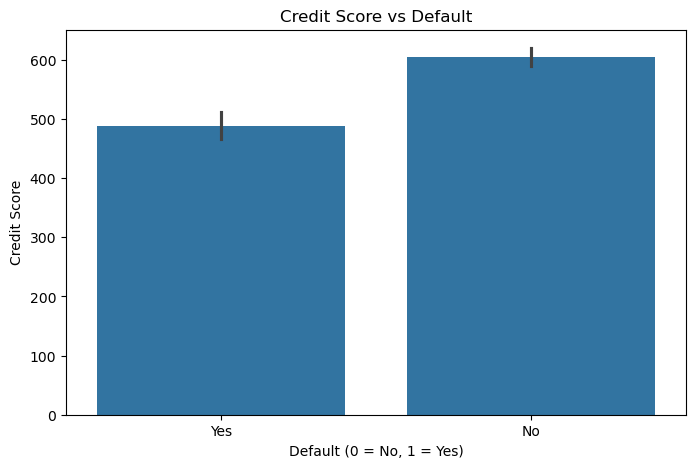

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x="default", y="credit_score", data=data)
plt.title("Credit Score vs Default")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Score")
plt.show()

* Borrowers who defaulted have lower credit scores (\~480).
* Borrowers who did not default have higher credit scores (\~600).
* Lower credit score = higher risk of default.

# Feature Engineering & Preprocessing 

# Encode categorical variables (gender, employment_type)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["employment_type"]=le.fit_transform(data["employment_type"])

In [21]:
data

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,1,28717,1,313,34453,48,Yes
1,49,1,147449,1,803,19544,12,No
2,35,0,48699,0,530,13258,36,Yes
3,63,0,93686,0,383,31841,48,No
4,28,1,87661,0,429,49758,24,Yes
...,...,...,...,...,...,...,...,...
495,33,1,146944,0,787,1155,24,No
496,32,1,132726,1,423,2958,24,No
497,51,1,101974,0,713,11693,60,No
498,22,0,125947,0,471,40112,48,No


# Normalize/scale continuous features (income, credit_score, loan_amount)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_cols = ["income", "credit_score", "loan_amount"]

data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [23]:
data

,age,gender,income,employment_type,credit_score,loan_amount,loan_term,default
0,59,1,-1.401814,1,-1.708593,0.727042,48,Yes
1,49,1,1.590543,1,1.457310,-0.337522,12,No
2,35,0,-0.898216,0,-0.306550,-0.786368,36,Yes
3,63,0,0.235575,0,-1.256321,0.540534,48,No
4,28,1,0.083729,0,-0.959114,1.819882,24,Yes
...,...,...,...,...,...,...,...,...
495,33,1,1.577816,0,1.353934,-1.650572,24,No
496,32,1,1.219485,1,-0.997880,-1.521831,24,No
497,51,1,0.444454,0,0.875818,-0.898116,60,No
498,22,0,1.048636,0,-0.687750,1.131118,48,No


# Define target variable = default

In [24]:
X = data.drop("default", axis=1)  
y = data["default"]      

#  Predictive Modeling (Decision Tree) 

# Split the dataset into training (80%) and testing (20%)

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train

,age,gender,income,employment_type,credit_score,loan_amount,loan_term
249,48,1,-1.520242,0,0.488156,1.250577,60
433,25,0,1.293278,1,1.218252,0.253347,12
19,64,1,-0.647727,0,-0.054570,0.403867,24
322,24,1,1.143247,1,1.670524,0.318610,60
332,57,1,0.226325,0,1.321629,1.039078,60
...,...,...,...,...,...,...,...
106,59,1,1.457675,0,-1.140022,-0.725604,60
270,23,1,-0.327200,1,-1.127100,-0.042980,48
348,60,0,-0.285061,0,-0.157946,-1.605873,36
435,49,0,-0.458077,1,1.101954,0.231640,12


In [33]:
X_test

,age,gender,income,employment_type,credit_score,loan_amount,loan_term
361,29,0,-0.504349,0,-1.262782,0.026924,48
73,28,1,0.286408,0,0.404163,0.598729,60
374,40,1,1.345296,1,0.656143,-1.203868,36
155,52,0,1.183067,0,0.358936,-0.291109,60
104,25,0,-0.661034,0,0.294326,-1.096905,24
...,...,...,...,...,...,...,...
347,23,0,-0.102317,2,-1.521223,-0.594934,36
86,49,0,0.200719,0,0.875818,0.046918,36
75,43,0,-1.186508,1,0.475234,1.044576,60
438,46,0,0.962947,0,-1.747359,0.694267,36


In [34]:
y_train

249    Yes
433     No
19      No
322     No
332     No
      ... 
106     No
270    Yes
348     No
435     No
102     No
Name: default, Length: 400, dtype: object

In [35]:
y_test

361     No
73      No
374     No
155     No
104     No
      ... 
347    Yes
86      No
75     Yes
438    Yes
15      No
Name: default, Length: 100, dtype: object

# Train a Decision Tree Classifier to predict loan default

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)     

RandomForestClassifier(random_state=42)

In [41]:
y_pred=random_forest.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

In [43]:
cls_rep=classification_report(y_test,y_pred)
print('\n Classification Report: \n',cls_rep)


 Classification Report: 
               precision    recall  f1-score   support

          No       0.88      0.92      0.90        79
         Yes       0.65      0.52      0.58        21

    accuracy                           0.84       100
   macro avg       0.76      0.72      0.74       100
weighted avg       0.83      0.84      0.83       100



In [45]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy Score: ',accuracy)

Accuracy Score:  0.84


# Interpret the Decision Tree

income             0.371585
credit_score       0.238731
loan_amount        0.131037
age                0.124488
loan_term          0.064646
employment_type    0.045175
gender             0.024338
dtype: float64


<Axes: title={'center': 'Feature\xa0Importance'}>

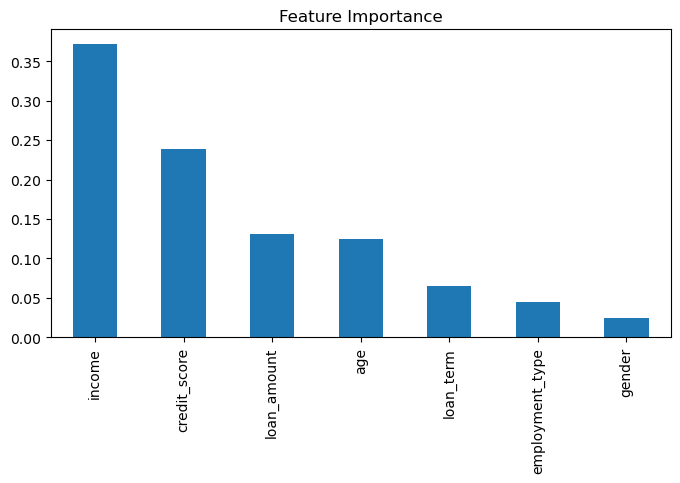

In [49]:
importances = pd.Series(random_forest.feature_importances_, index=X.columns)

importances = importances.sort_values(ascending=False)
print(importances)

importances.plot(kind='bar', figsize=(8,4), title='Feature Importance')